In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)

170498071/170498071 [==============================] - 3s 0us/step
Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


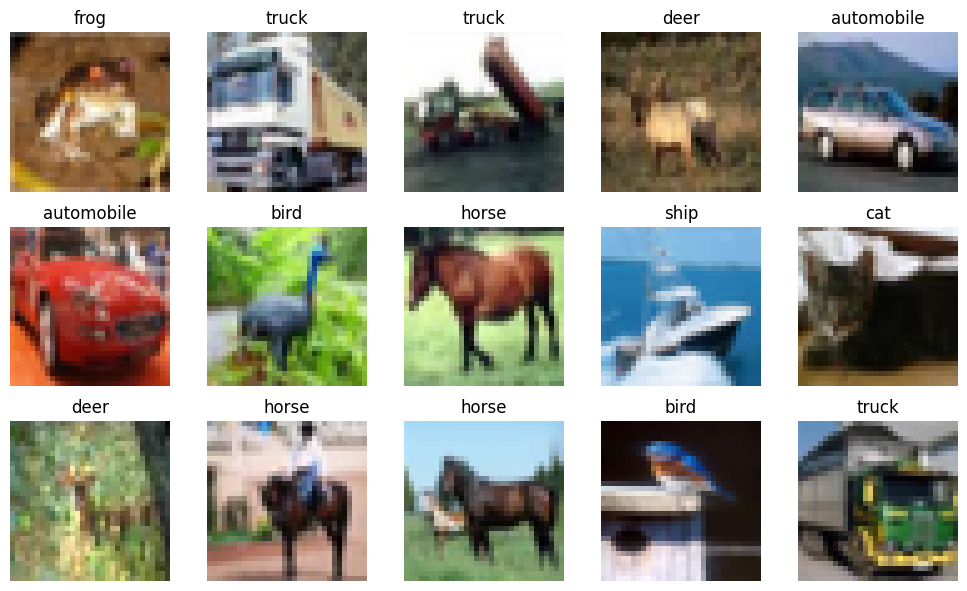

In [3]:
 def plot_images(images, labels, classes, normalize=True):
    fig, axes = plt.subplots(3, 5, figsize=(10, 6))
    axes = axes.flatten()

    for img, ax, label in zip(images, axes, labels):
        if normalize:
            img = img - img.min()
            img = img / img.max()
        ax.imshow(img)
        ax.set_title(classes[label[0]])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plot_images(x_train[:15], y_train[:15], class_names)

In [4]:
model = Sequential([Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),MaxPooling2D((2, 2)),
                    Conv2D(64, (3, 3), activation='relu'),MaxPooling2D((2, 2)),
                    Flatten(),Dense(64, activation='relu'),Dense(10)])

In [5]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [6]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 12s 5ms/step - loss: 1.4744 - accuracy: 0.4684 - val_loss: 1.2403 - val_accuracy: 0.5650
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1043 - accuracy: 0.6123 - val_loss: 1.0493 - val_accuracy: 0.6339
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9750 - accuracy: 0.6598 - val_loss: 0.9835 - val_accuracy: 0.6586
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8899 - accuracy: 0.6909 - val_loss: 0.9180 - val_accuracy: 0.6832
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8273 - accuracy: 0.7116 - val_loss: 0.9161 - val_accuracy: 0.6826
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7728 - accuracy: 0.7289 - val_loss: 0.9080 - val_accuracy: 0.6953
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7257 - accuracy: 0.7457 - val_loss: 0.9052 - val_accuracy

In [7]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.9130 - accuracy: 0.7038 - 614ms/epoch - 2ms/step

Test accuracy: 0.7038000226020813


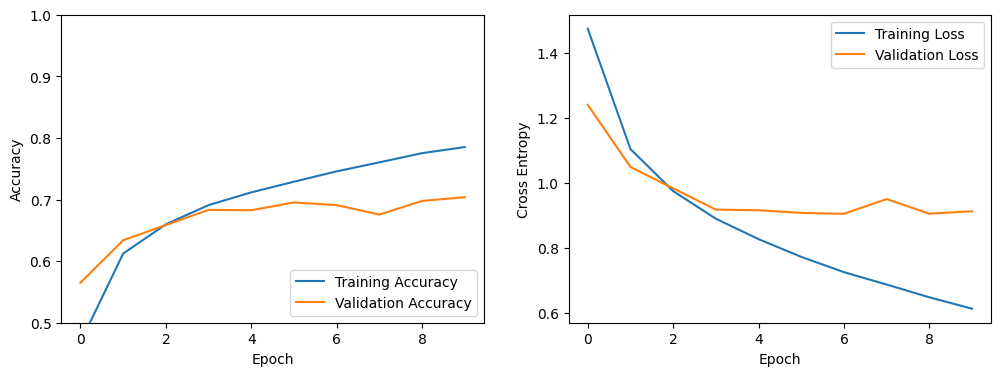

In [8]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.legend(loc='upper right')
plt.show()